# Credit Risk Prediction for German Bank: Phase 2 - Predictive Modeling

*Submitted in partial fulfillment of the requirements for : Machine Learning (MATH2319) | Master of Analytics, RMIT University, Melbourne*
***

<p style="text-align:center;">
    <img src="images/Sell-with-Less-Risk.gif" alt="credit-risk" title="Credit Risk Prediction" width="500"><br>
    <center><i>Predictive Modeling of Credit Risk <a id="ref2" href=#2>[2]</a></i></center>
</p>

# Table of Contents

* [Introduction](#Introduction)
    * [Report Overview](#Report-Overview)
    * [Methodology Overview](#Methodology-Overview)
* [Predictive Modelling](#Predictive-Modelling)
    * [Feature Selection](#Feature-Selection)
    * [Model Fitting & Tuning](#Model-Fitting-&-Tuning)
        * [K-Nearest Neighbors (KNN)](#K-Nearest-Neighbors-%28KNN%29)
        * [Gaussian Naive Bayes (NB)](#Gaussian-Naive-Bayes-%28NB%29)
        * [Decision Trees (DT)](#Decision-Trees-%28DT%29)
        * [Random Forests (RF)](#Random-Forests-%28RF%29)
    * [Model Comparison](#Model-Comparison)
        * [Paired t-tests](#Paired-t-tests)
        * [Performance Evaluation](#Performance-Evaluation)
            * [Classification Reports](#Classification-Reports)
            * [ROC Curves](#ROC-Curves)
            * [Precision-Recall Curves](#Precision-Recall-Curves)
* [Critique & Limitations](#Critique-&-Limitations)
* [Summary & Insights](#Summary-&-Insights)
* [Conclusion](#Conclusion)
* [References](#References)

## Introduction

### Report Overview

Credit risk is the risk of a borrower not repaying a loan, credit card or any other type of credit facility. It is an important topic in financial domain because banks and other financial institutions heavily invest in reducing their credit risk. Credit risk modelling can therefore help reduce risk and prevent society from experiencing financial crises. 

The objective of this project is to build and compare four different ML models to predict the credit risk and therefore probability of person defaulting a loan using the 1973-1975 South German Credit data set from the UCI Machine Learning Repository <a id="ref3" href=#3>[3]</a>. The full dataset contains 1000 observations with 20 descriptive features. The target feature has two classes defined as "good" and "bad" for good credit risk and bad credit risk, respectively. The report is organized as follows:

1. Overview of methodologies applied in predictive modelling.
2. Feature Selection using Random Forest Importance (RFI).
3. Model Fitting using 4 different ML classification algorithms.
4. Hyper-parameter Tuning for each classification algorithm.
5. Model Comparison using statistical tests results to indicate which model seems to work best.
6. Model Evaluation using different performance metrics.
7. Critique & limitations discussing limitations of our approach and possible solutions.
8. Summary and conclusions providing a brief summary of our work in this project.

We will be using Jupyter Notebook for compilation of this report, which includes all the Python codes with their respective description.

### Methodology Overview

Our target feature `credit_risk` is a binary variable with the following two classes:
- $1\rightarrow\text{good credit risk}$
- $0\rightarrow\text{bad credit risk}$

Since this is a binary classification problem, we proceed with supervised learning and apply the following classifiers from different `Scikit-Learn` sub-modules:

- K-Nearest Neighbors (KNN)
- Gaussian Naive Bayes (NB)
- Decision Trees (DT)
- Random Forests (RF)

As our data is already properly cleaned, encoded, and scaled in Phase I, we begin by importing the predictors and target datasets (in the form of `NumPy` arrays) generated from the previous phase. Next, we apply Random Forest Importance method on the full dataset for quickly examining the top 10 features. 

After this, we split the datasets into training and test sets with a 70:30 ratio, i.e., our training data has 700 rows (used during hyperparameter tuning) and test data has 300 rows (used during performance comparison). Since our dataset is imbalanced, i.e., it contains more instances of good credit than bad credits, we perform stratification while applying splitting. This is done so as to ensure that each validation set has the same proportion of classes as in the original dataset.

Using the powerful Random Forest Importance method on the training data, we select the 10 best features. Next, we conduct 5-fold stratified cross-validation with 3 repetitions within a grid search to fine-tune hyperparameters of the classifier using area under curve (AUC) as the performance scoring metric. We build each model using parallel processing with "-2" cores, i.e., all CPU cores but one are used. These steps are repeated for each of the classifiers. 

Once we identify the tuned classifiers with the best hyperparameters, we fit them on the test data using 5-fold cross-validation with 3 repetitions in a paired fashion and perform paired t-tests to see if any performance difference is statistically significant. Finally, we evaluate the performance of individual classification models on the test data using classification reports, ROC curves and Precision-Recall curves.

## Predictive Modelling

### Feature Selection

Firstly, we load the `predictors_learn.csv` and `target_learn.csv` files generated in Phase I from the local storage.
We set some output options for filtering out any warnings, viewing all columns of a `pandas` dataframe and produce `ggplot`-style plots. Here, at the beginning of the notebook, we set the seed to a particular value so that our results can reproduced later.

In [1]:
# import required modules
import numpy as np
import pandas as pd
import warnings
from sklearn import metrics
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV

# ignore warnings
warnings.filterwarnings("ignore")

# view all columns
pd.set_option('display.max_columns', None) 

# set seed for reproducibility of results
np.random.seed(777)

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10,8)

# read array files
pred = np.loadtxt('./data/predictors_learn.csv', delimiter=",")
tar = np.loadtxt('./data/target_learn.csv', dtype='int', delimiter=",") # dtype='int' as values are 0 and 1

We view both the imported datasets `pred` and `tar` for examination.

In [2]:
print(type(pred))
pred

<class 'numpy.ndarray'>


array([[0.        , 0.20588235, 0.0439639 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.07352941, 0.14025531, ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.11764706, 0.03251898, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.25      , 0.6839441 , ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.11764706, 0.34213712, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.38235294, 0.33564433, ..., 0.        , 1.        ,
        0.        ]])

In [3]:
print(type(tar))
tar

<class 'numpy.ndarray'>


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

We can see that both the datasets are in `NumPy` array formats, having no column headers. However, for feature selection on the full dataset, we need the feature names. So, we import the `pred_df.csv` file for extracting column names from the dataframe.

In [4]:
# read dataframe file
preds_df = pd.read_csv('./data/preds_df.csv')
preds_df.columns

Index(['status', 'duration', 'amount', 'savings', 'employment_duration',
       'installment_rate', 'present_residence', 'age', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_history_0',
       'credit_history_1', 'credit_history_2', 'credit_history_3',
       'credit_history_4', 'purpose_0', 'purpose_1', 'purpose_2', 'purpose_3',
       'purpose_4', 'purpose_5', 'purpose_6', 'purpose_8', 'purpose_9',
       'purpose_10', 'personal_status_sex_1', 'personal_status_sex_2',
       'personal_status_sex_3', 'personal_status_sex_4', 'other_debtors_1',
       'other_debtors_2', 'other_debtors_3', 'property_1', 'property_2',
       'property_3', 'property_4', 'other_installment_plans_1',
       'other_installment_plans_2', 'other_installment_plans_3', 'housing_1',
       'housing_2', 'housing_3'],
      dtype='object')

In order to gain some insights on the full dataset, we rank the 10 most relevant descriptive features using Random Forest Importance (RFI).

In [5]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100, random_state=777)
model_rfi.fit(pred, tar)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = preds_df.columns[fs_indices_rfi].values
best_features_rfi

array(['amount', 'status', 'duration', 'employment_duration', 'savings',
       'present_residence', 'installment_rate', 'age', 'job', 'purpose_0'],
      dtype=object)

So, we see that `amount`, `status`, `duration`, `employment_duration`, `savings`, `present_residence`, `installment_rate`, `age`, `job`, and `purpose_0` (other purposes) are the top 10 important features for predicting credit risk. Next, we visualize these features ranking them based on their importances.

In [6]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.12458348, 0.10457646, 0.0937173 , 0.05057112, 0.04787826,
       0.04018074, 0.03943006, 0.03494177, 0.03351869, 0.02098716])

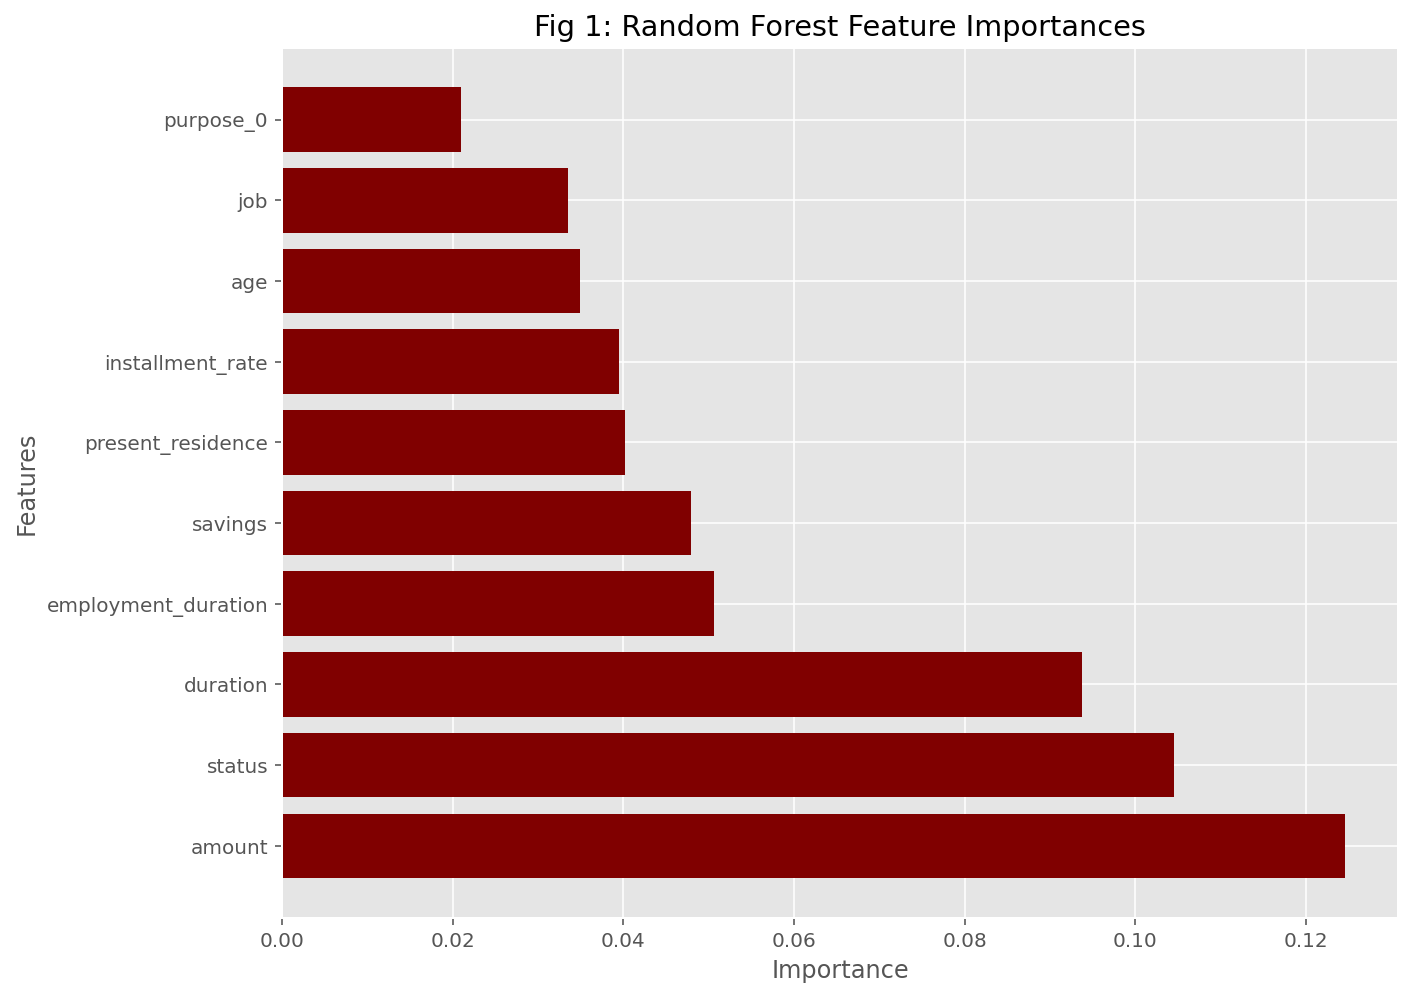

In [7]:
plt.barh(best_features_rfi, feature_importances_rfi, color='maroon')
plt.title('Fig 1: Random Forest Feature Importances')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

We observe that the most important feature is `amount`, followed by `status`, `duration` and `employment_duration`.

### Model Fitting & Tuning

We proceed to split the two datasets (`pred` and `tar`) into a training set and a test set in 70:30 ratio. That is, we use 70 % of the data to build a classifier and evaluate its performance on the rest 30% of the data.

However, looking at unique values of target feature, we see that there is an uneven proportion of classes - 300 observations of class "0" class and 700 observations of class "1". In order to ensure the proportion does not deviate from the ratio of 300/700 when splitting the data, we set the `stratify` option in `train_test_split` function to the `tar` array. This is done to handle class imbalance in target feature.

In [8]:
np.unique(tar, return_counts = True)

(array([0, 1]), array([300, 700], dtype=int64))

To split the datasets, we use `train_test_split` function from `sklearn`. Furthermore, we set a seed to `random_state` for reproducibility of results and we set the shuffle option to "True" to ensure the data is split randomly.

In [9]:
# train-test split
from sklearn.model_selection import train_test_split

pred_train, pred_test, tar_train, tar_test = train_test_split(pred, tar, 
                                                              test_size = 0.3, 
                                                              random_state=777, 
                                                              stratify = tar,
                                                              shuffle = True)
print(pred_train.shape)
print(pred_test.shape)

(700, 45)
(300, 45)


We can see that the `pred_train` contains 700 records and `pred_test` contains 300 records. Looking at the class distributions in `tar_train` and `tar_test`, we can see that the 30:70 ratio is maintained.

In [10]:
np.unique(tar_train, return_counts = True)

(array([0, 1]), array([210, 490], dtype=int64))

In [11]:
np.unique(tar_test, return_counts = True)

(array([0, 1]), array([ 90, 210], dtype=int64))

Now that the data is properly split, we define our model evaluation strategy. For each model, we will use 5-fold stratified cross-validation evaluation method with 3 repetitions for hyperparameter tuning.

In [12]:
# 5-fold stratified cross-validation evaluation method
cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=777)

Also during the tuning phase, we will include Random Forest Importance (RFI) method with 100 estimators to search for 10 features that work best with each classifier.

In [13]:
num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100, random_state=777)
model_rfi.fit(pred_train, tar_train)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

#### K-Nearest Neighbors (KNN)

We first define a nearest neighbor classifier with default hyperparameters and take a look at the values.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# looking at default parameters
from pprint import pprint
print('Parameters currently in use:\n')
pprint(knn_classifier.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


The KNN hyperparameters to be tuned are as follows:
- `n_neighbors`: number of neighbors 
- `p`: distance metric
- `weights`: weight function used in prediction

We define the hyperparameters over possible ranges under `params_KNN`, use grid search method for tuning and fit the model on training data for 10 best selected features.

In [15]:
# hyperparameters to be tuned
params_KNN = {'n_neighbors': list(range(1,30)),
              'p': [1, 2, 5], #1: Manhattan, 2: Euclidean, 5:Minkowski
              'weights':['uniform', 'distance']}

# grid search          
gs_KNN = GridSearchCV(estimator= knn_classifier, 
                      param_grid=params_KNN,
                      cv = cv_method,
                      refit = True,
                      n_jobs = -2,
                      scoring = 'roc_auc',
                      verbose = 1,
                      return_train_score=True)

In [16]:
gs_KNN.fit(pred_train[:, fs_indices_rfi], tar_train);

Fitting 15 folds for each of 174 candidates, totalling 2610 fits


We call the `best_params_` attribute to get the best parameter values, and `best_score_` attribute to get its corresponding mean AUC score.

In [17]:
# best hyperparameters
print("Best Hyperparameters:",gs_KNN.best_params_)
# best AUC score of the best_estimator
print('Best Score:', gs_KNN.best_score_)

Best Hyperparameters: {'n_neighbors': 23, 'p': 1, 'weights': 'distance'}
Best Score: 0.7819970845481048


We observe that the best parameters with an AUC score of 78.20% are:
- 23 neighbors
- p=1, i.e., Manhattan  distance metric
- weight points by the inverse of their distance

We examine other combinations as well to see if the difference is significant or no, using grid search outputs as a `Pandas` data frame. Then, we plot the AUC scores against the no. of neighbors by distance metrics for the grid search results.

In [18]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN.head()

,n_neighbors,p,weights,test_score,metric
0,1,1,uniform,0.660658,Manhattan
1,1,1,distance,0.660658,Manhattan
2,1,2,uniform,0.639116,Euclidean
3,1,2,distance,0.639116,Euclidean
4,1,5,uniform,0.635488,Minkowski


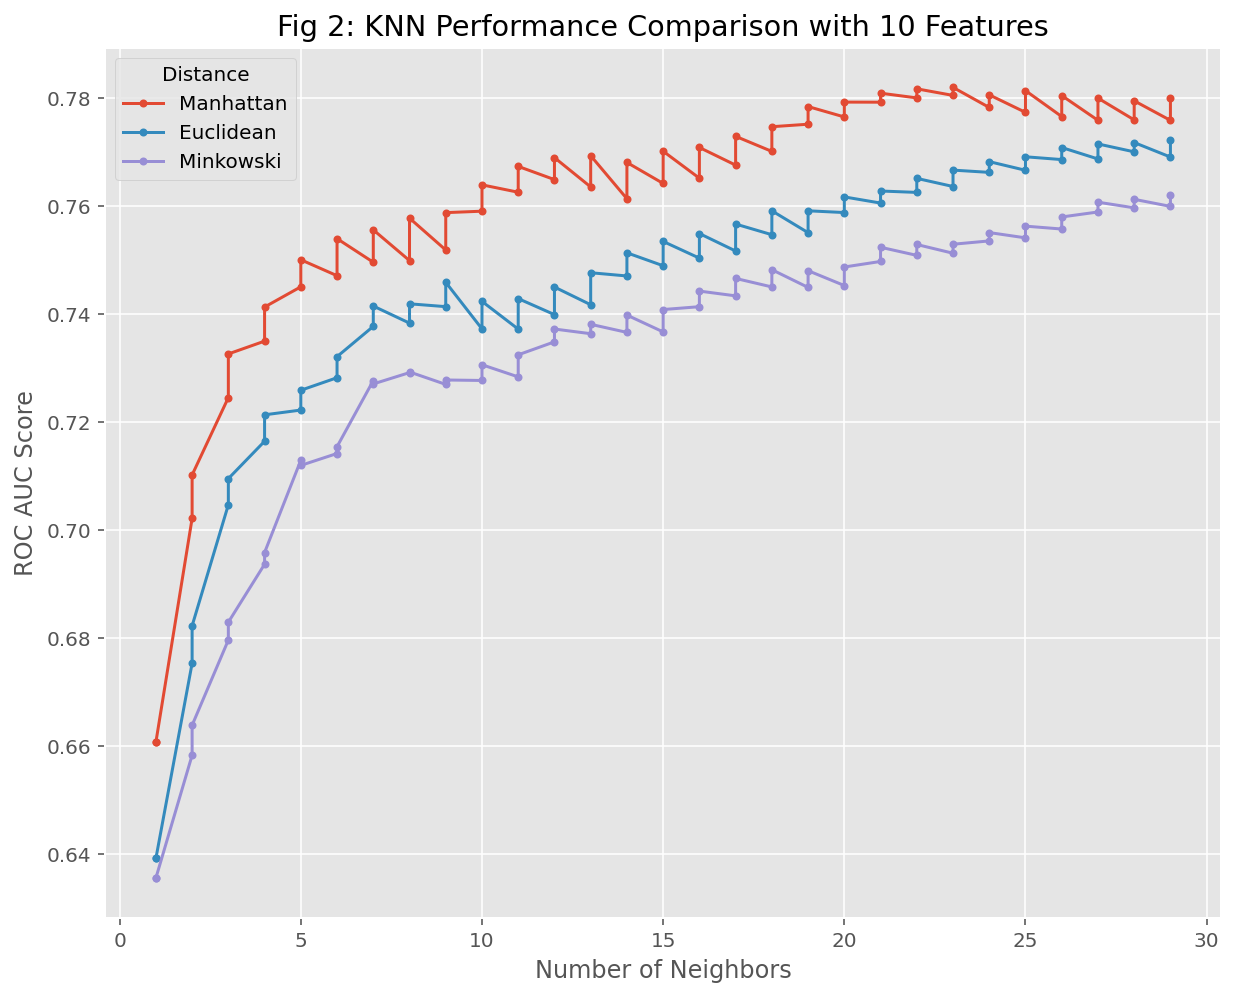

In [19]:
for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend(title = "Distance")
plt.xlabel("Number of Neighbors")
plt.ylabel("ROC AUC Score")
plt.title("Fig 2: KNN Performance Comparison with 10 Features")
plt.show()

The plot above shows that for all nearest neighbor values, Manhattan distance metric (p=1) works the best overall. Specifically with 23 nearest neighbors, it peaks and therefore, outperforms all other combinations.

#### Gaussian Naive Bayes (NB)

Now we implement a Gaussian Naive Bayes classifier and examine the default hyperparameters.

In [20]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

# looking at default parameters
from pprint import pprint
print('Parameters currently in use:\n')
pprint(nb_classifier.get_params())

Parameters currently in use:

{'priors': None, 'var_smoothing': 1e-09}


Here, we first perform a power transformation on the input data before model fitting as Naive Bayes algorithm requires each descriptive feature to follow a Gaussian or normal distribution.

In [21]:
from sklearn.preprocessing import PowerTransformer
pred_train_transformed = PowerTransformer().fit_transform(pred_train[:, fs_indices_rfi])

Next, we proceed with tuning its only important hyperparameter: `var_smoothing`, which is a variant of Laplace smoothing. For this, we conduct a grid search in the `logspace` (over the powers of 10) by starting with $10^0$ and ending with $10^{−9}$ with 200 different values. Then, we fit this model on the training data for 10 best selected features.

In [22]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(777)

# hyperparameter to be tuned
params_NB = {'var_smoothing': np.logspace(0,-9, num=200)}

# grid search
gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1,
                     refit=True,
                     n_jobs=-2,
                     scoring='roc_auc')

In [23]:
gs_NB.fit(pred_train[:, fs_indices_rfi], tar_train);

Fitting 15 folds for each of 200 candidates, totalling 3000 fits


We call the `best_params_` attribute to get the best parameter values, and `best_score_` attribute to get its corresponding mean AUC score.

In [24]:
# best hyperparameters
print("Best Hyper Parameters:",gs_NB.best_params_)
# mean AUC score of the best_estimator
print('Best Score - KNN:', gs_NB.best_score_)

Best Hyper Parameters: {'var_smoothing': 0.12458833642950079}
Best Score - KNN: 0.7787010042112084


We observe that the best estimator with a mean AUC score of 77.87% has `var_smoothing` = 0.125. We also examine other combinations to see if there are any significant differences and then plot the AUC scores vs. `var_smoothing` values to visualize the search results.

In [25]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
results_NB.head()

,var_smoothing,test_score
0,1.000000,0.773599
1,0.901102,0.774069
2,0.811984,0.774376
3,0.731681,0.774798
4,0.659319,0.774717


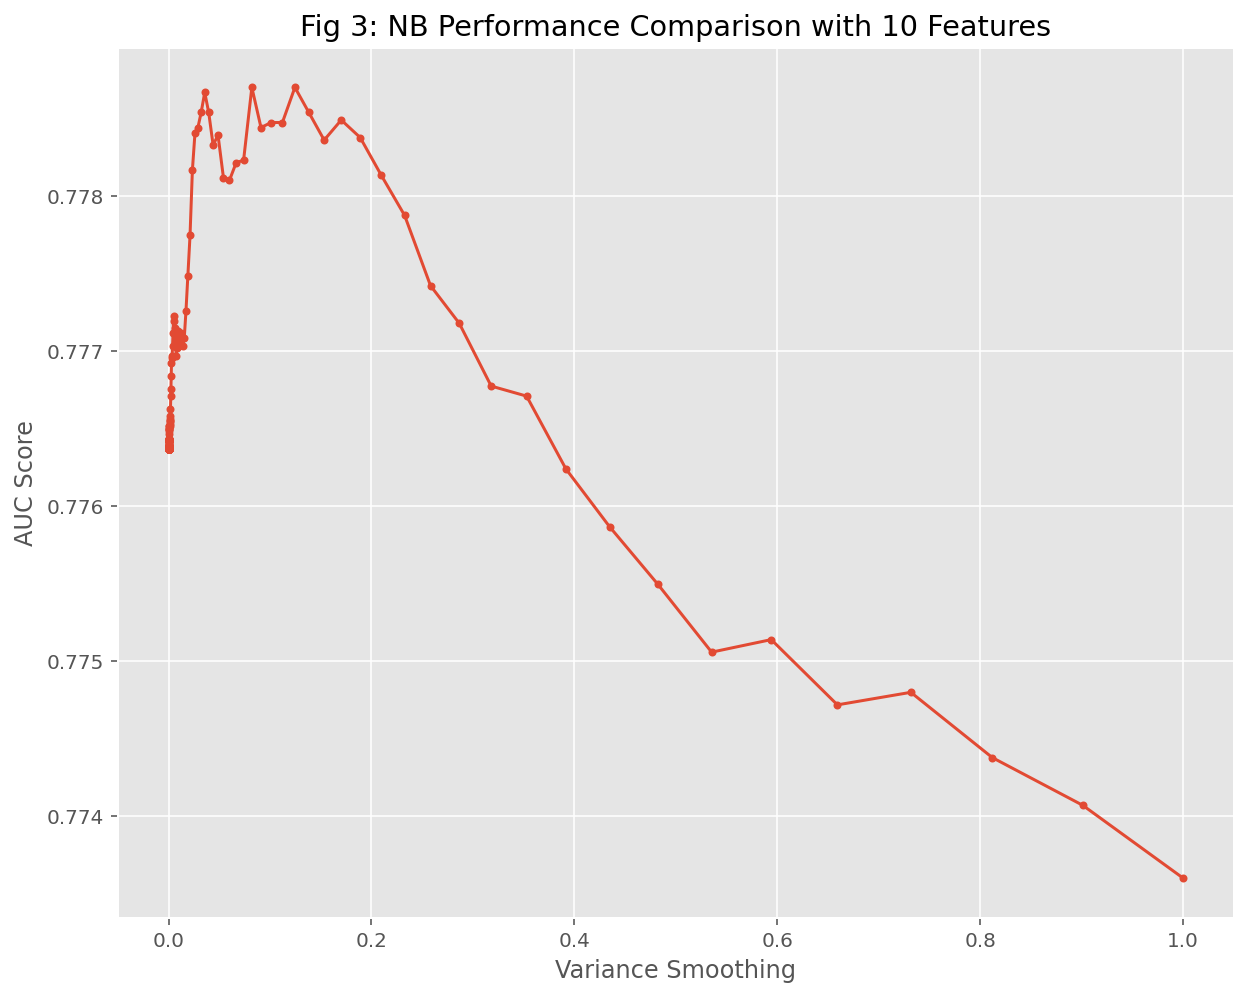

In [26]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel("Variance Smoothing")
plt.ylabel("AUC Score")
plt.title("Fig 3: NB Performance Comparison with 10 Features")
plt.show()

The plot above shows that for `var_smoothing` of around 0.12, Naive Bayes gives the highest AUC score outperforming other combinations.

#### Decision Trees (DT)

We fit a decision tree classifier with the default hyperparameters and examine the values. For reproducibility, we set `random_state = 777`.

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=777)

# looking at default parameters
from pprint import pprint
print('Parameters currently in use:\n')
pprint(dt_classifier.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 777,
 'splitter': 'best'}


The DT hyperparameters to be tuned are as follows:

- `criterion`: function to measure the quality of a split
- `max_depth`: maximum depth of the tree
- `min_samples_split`: minimum number of samples required to split an internal node

We define these hyperparameters over possible ranges under `params_DT`, optimize them using use grid search method and fit the model on the training data for 10 best selected features. For reproducibility, we set `random_state = 777`.

In [28]:
# hyperparameters to be tuned
params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': list(range(1,20)),
             'min_samples_split': [1, 2, 3, 4, 5, 6]}

# use GridSearch  
gs_DT = GridSearchCV(estimator=dt_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     refit = True,
                     n_jobs = -2,
                     verbose=1, 
                     scoring='roc_auc',
                     return_train_score=True)

In [29]:
gs_DT.fit(pred_train[:, fs_indices_rfi], tar_train);

Fitting 15 folds for each of 228 candidates, totalling 3420 fits


Now, we call the `best_params_` attribute to get the best parameter values and `best_score_` attribute to get its corresponding mean AUC score.

In [30]:
# best hyperparameters
print("Best Hyper Parameters:",gs_DT.best_params_)
# mean AUC score of the best_estimator
print('Best Score - KNN:', gs_DT.best_score_)

Best Hyper Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5}
Best Score - KNN: 0.7406948493683188


We observe that the best parameters with an AUC score of 74.07% are:

- `criterion` = `gini` for Gini impurity 
- `max_depth`= 4
- `min_samples_split` = 5

We examine other combinations as well to see if there is any significant difference, using grid search outputs as a Pandas data frame. Then, we plot the AUC scores against the maximum depth by split criterion while taking the average of `min_samples_split` hyperparameter.

In [31]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.head()

,criterion,max_depth,min_samples_split,test_score
0,gini,1,1,NaN
1,gini,1,2,0.686735
2,gini,1,3,0.686735
3,gini,1,4,0.686735
4,gini,1,5,0.686735


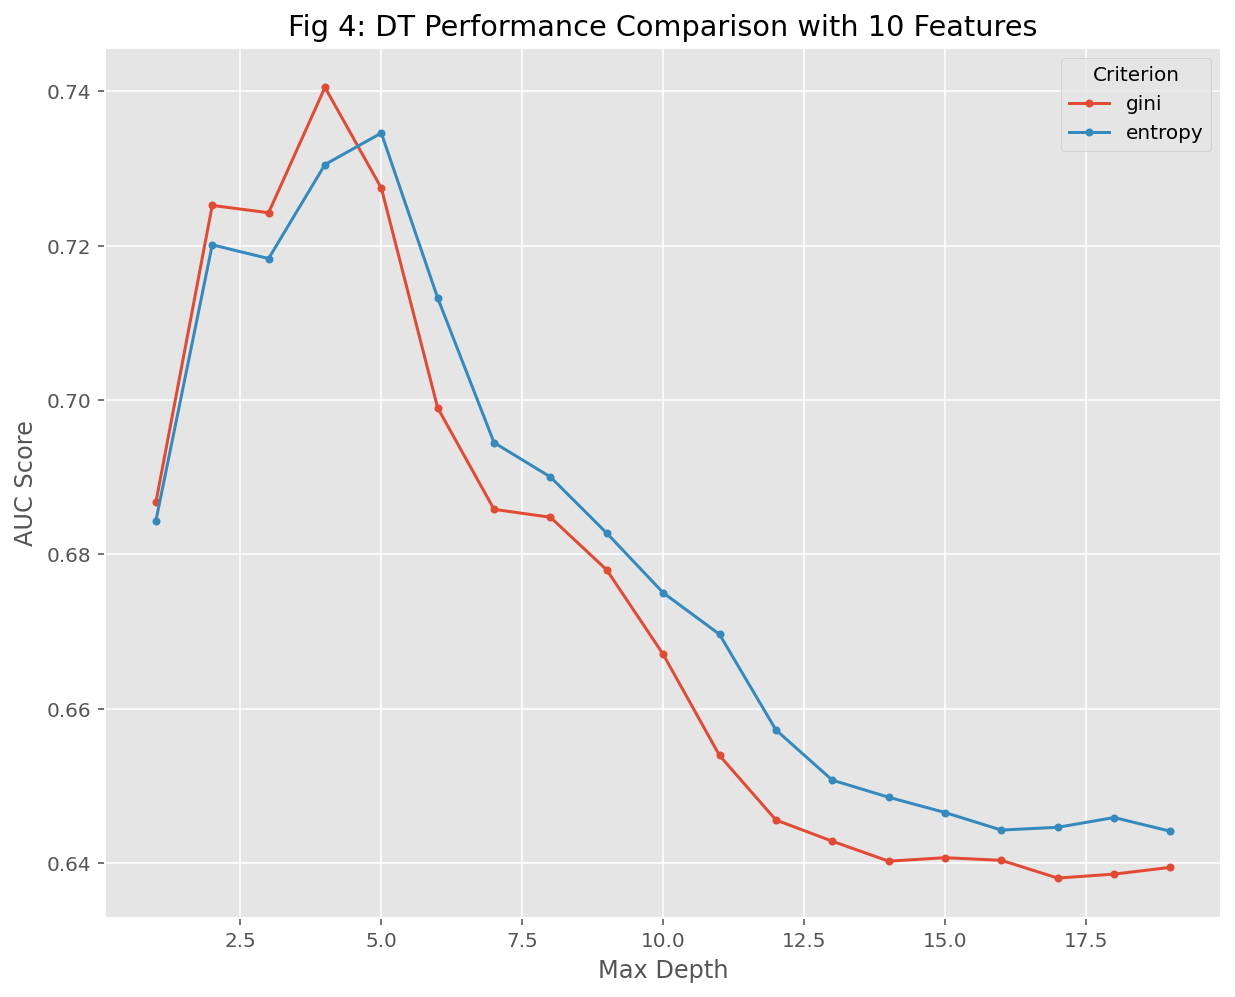

In [32]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
plt.legend(title = "Criterion")
plt.xlabel("Max Depth")
plt.ylabel("AUC Score")
plt.title("Fig 4: DT Performance Comparison with 10 Features")
plt.show()

The plot shows that for a maximum depth of around 4, the `gini` criterion line has the highest AUC score. So, it works the best and outperforms all other combinations.

#### Random Forests (RF)

Finally, we fit a random forest classifier with default hyperparameters. Random forest classifier is a popular ensemble method based on the idea of "bagging" where the sub-classifiers are decision trees and the final outcome is determined by a majority voting of the decision trees.

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state = 777)

To look at the available hyperparameters, we examine the default values.

In [34]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 777,
 'verbose': 0,
 'warm_start': False}


Here, as per `sklearn` documentation, the most important settings are the number of trees in the forest (`n_estimators`) and the number of features considered for splitting at each leaf node (`max_features`).

We will try adjusting the following set of hyperparameters:
- `n_estimators` = number of trees in the forest
- `max_features` = max number of features considered for splitting a node
- `max_depth` = max number of levels in each decision tree
- `min_samples_split` = min number of data points placed in a node before the node is split
- `min_samples_leaf` = min number of data points allowed in a leaf node
- `bootstrap` = method for sampling data points (with or without replacement)

Searching across the entire set of hyperparameter combinations in a complete grid search would be time consuming. So, we use `RandomizedSearchCV` method first which will only search a randomly selected small subset of the hyperparameter space, performing K-Fold CV with each combination of values. Here, we specify `n_iter=200` which indicates that we try altogether total 200 random hyperparameter combinations.

In [35]:
params_RF_rand = {'n_estimators': list(range(100,1000,100)),
                  'criterion': ["gini", "entropy"],
                  'max_depth': list(range(10,100,10)) + [None],
                  'min_samples_split': list(range(1,15)),
                  'min_samples_leaf': [1, 2, 3, 4, 5],
                  'max_features': ["sqrt", "log2", None],
                  'bootstrap': [True, False]}

from sklearn.model_selection import RandomizedSearchCV
gs_RF_rand = RandomizedSearchCV(estimator=rf_classifier, 
                           param_distributions=params_RF_rand,
                           n_iter=200,
                           cv=cv_method,
                           verbose=1,
                           refit=True,
                           n_jobs=-2,
                           random_state=777,
                           scoring='roc_auc')

Now we fit this model on the training set.

In [36]:
gs_RF_rand.fit(pred_train[:, fs_indices_rfi], tar_train);

Fitting 15 folds for each of 200 candidates, totalling 3000 fits


Now, we call the `best_params_` attribute to get the best parameter values and `best_score_` attribute to get its corresponding mean AUC score.

In [37]:
pprint(gs_RF_rand.best_params_)
print(f'\nBest Score: {gs_RF_rand.best_score_}')

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 100}

Best Score: 0.7985098801425333


From the results, we find that the best estimator has a mean AUC score of 79.85%. We further improve our results by using grid search to focus on the most promising hyperparameters ranges found in the random search. Now that we know where to concentrate our search, we explicitly specify every combination of settings to try. We do this with `GridSearchCV`, a method that evaluates all combinations we define instead of sampling randomly from a distribution.

In [38]:
params_RF = {'n_estimators': [70, 75, 80, 85, 90],
             'min_samples_split': [1, 2, 3, 4],
             'min_samples_leaf': [3, 4, 5, 6],
             'criterion': ['gini'],
             'max_depth': [20, 40, 60, 80],
             'max_features': ['sqrt'],
             'bootstrap': [True]}

gs_RF = GridSearchCV(estimator=rf_classifier, 
                     param_grid=params_RF, 
                     cv=cv_method,
                     verbose=1,
                     refit=True,
                     n_jobs=-1,
                     scoring='roc_auc')

In [39]:
gs_RF.fit(pred_train[:, fs_indices_rfi], tar_train);

Fitting 15 folds for each of 320 candidates, totalling 4800 fits


In [40]:
# best hyperparameters
print(f'Best Hyper Parameters:\n{gs_RF.best_params_}')

# mean AUC score of the best_estimator
print(f'\nBest Score - KNN: {gs_RF.best_score_}')

Best Hyper Parameters:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 75}

Best Score - KNN: 0.7987204405571754


We can see that the AUC score has improved marginally to 79.87%. Using the best hyperparameters from the previous result, we can give one more try with a further refined grid. It is best to get the results of random search and validate them in grid search within a tighter range.

In [41]:
params_RF = {'n_estimators': [71, 73, 75, 77, 79],
             'min_samples_split': [1, 2, 3],
             'min_samples_leaf': [4, 5, 6],
             'criterion': ['gini'],
             'max_depth': [10, 15, 20, 25, 30],
             'max_features': ['sqrt'],
             'bootstrap': [True]}

gs_RF = GridSearchCV(estimator=rf_classifier, 
                     param_grid=params_RF, 
                     cv=cv_method,
                     verbose=1,
                     refit=True,
                     n_jobs=-2,
                     scoring='roc_auc')

In [42]:
gs_RF.fit(pred_train[:, fs_indices_rfi], tar_train);

Fitting 15 folds for each of 225 candidates, totalling 3375 fits


In [43]:
# best hyperparameters
print(f'Best Hyper Parameters:\n{gs_RF.best_params_}')

# mean AUC score of the best_estimator
print(f'\nBest Score - KNN: {gs_RF.best_score_}')

Best Hyper Parameters:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 77}

Best Score - KNN: 0.8000000000000002


We see a further increase in the AUC score to 80%, which is a good score for the model. So, the corresponding best hyperparameters are as follows: 

- `n_estimators`: 77
- `min_samples_split`: 2
- `min_samples_leaf`: 5
- `max_features`: 'sqrt'
- `max_depth`: 10
- `criterion`: 'gini'
- `bootstrap`: True

### Model Comparison

#### Paired t-tests

For performance assessment of all the tuned classifiers used in above steps, we use repeated cross-validation as it provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the test dataset, as calculated using the standard error.

Now we compare the best estimators amongst the 4 classifiers using the same stratified 5-fold cross-validation with 3 repetitions and we set the same random seed in each of the 4 cross-validation runs. We continue using mean ROC AUC as our performance metric.

In [44]:
from sklearn.model_selection import cross_val_score

#KNN
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=pred_test[:, fs_indices_rfi],
                                 y=tar_test, 
                                 cv=cv_method, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
print('Score - KNN:',cv_results_KNN.mean().round(3))

#NB
cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                                X=PowerTransformer().fit_transform(pred_test[:, fs_indices_rfi]),
                                y=tar_test, 
                                cv=cv_method, 
                                n_jobs=-2,
                                scoring='roc_auc')
print('Score - NB:',cv_results_NB.mean().round(3))

#DT
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                X=pred_test[:, fs_indices_rfi],
                                y=tar_test, 
                                cv=cv_method, 
                                n_jobs=-2,
                                scoring='roc_auc')
print('Score - DT:',cv_results_DT.mean().round(3))

#RF
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,
                                X=pred_test[:, fs_indices_rfi],
                                y=tar_test, 
                                cv=cv_method, 
                                n_jobs=-2,
                                scoring='roc_auc')
print('Score - RF:',cv_results_RF.mean().round(3))

Score - KNN: 0.663
Score - NB: 0.707
Score - DT: 0.604
Score - RF: 0.669


So, the tuned classifiers in decreasing order of their performances on the test data are: $\text{NB (0.71) > RF (0.67) > KNN (0.66) > DT (0.60)}$

Since we fixed the random state to be same during cross-validation, all tuned classifiers were fitted and then tested on exactly the same data partitions, making our results "paired" in a statistical sense. This reduces the variability significantly compared to conducting experiments in an independent fashion.

Now, we conduct paired t-tests for the AUC scores in order to determine if any difference between the performances of any two classification methods is statistically significant; or if it is within the sample variation and the difference is statistically insignificant. For this, we use the `stats.ttest_rel` from `SciPy` module and look at the p-values. At a 95% confidence level, if the p-value is smaller than 0.05, we conclude that the difference is statistically significant.

In [45]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_DT)) # KNN vs DT
print(stats.ttest_rel(cv_results_KNN, cv_results_NB)) # KNN vs NB
print(stats.ttest_rel(cv_results_KNN, cv_results_RF)) # KNN vs RF
print(stats.ttest_rel(cv_results_DT, cv_results_NB)) # DT vs NB
print(stats.ttest_rel(cv_results_DT, cv_results_RF)) # DT vs RF
print(stats.ttest_rel(cv_results_NB, cv_results_RF)) # NB vs RF

Ttest_relResult(statistic=2.8011464850301584, pvalue=0.014148359454210694)
Ttest_relResult(statistic=-5.141412067957369, pvalue=0.00014983799478052038)
Ttest_relResult(statistic=-0.7498712556852547, pvalue=0.46574779211877004)
Ttest_relResult(statistic=-5.216428340075663, pvalue=0.00013060516560068705)
Ttest_relResult(statistic=-3.4164271952249234, pvalue=0.004174244254583238)
Ttest_relResult(statistic=5.259824203719447, pvalue=0.00012066855693315436)


We can see that the p-values for paired t-tests between NB and rest of the models are significantly lower than 0.05. Therefore from these results, we can conclude that at a 95% confidence level, **Gaussian Naive Bayes** is statistically the best model among all in terms of AUC when compared on the test data.

#### Performance Evaluation

So far, from all the ROC AUC scores of the best model estimators for each classifier, we have:

In [46]:
print('Best Score - KNN:', gs_KNN.best_score_)
print('Best Score - NB:', gs_NB.best_score_)
print('Best Score - DT:', gs_DT.best_score_)
print('Best Score - RF:', gs_RF.best_score_)

Best Score - KNN: 0.7819970845481048
Best Score - NB: 0.7787010042112084
Best Score - DT: 0.7406948493683188
Best Score - RF: 0.8000000000000002


Clearly, the **Random Forest** estimator is performing the best here. However, these scores are only based on the training set predictions and so, can't be relied upon for prediction capability with new unseen data. Therefore, we use the following binary classification performance measures to evaluate and compare the models based on the test set:

- `classification report` which gives precision, recall, f1-score and accuracy scores 
- ROC curves, and 
- Precision-Recall curves.

##### Classification Reports

Using `classification_report` from `sklearn.metrics` sub-module, we examine sensitivity of each model with respect to its best hyperparameters. This includes the following evaluation metrics based on the test set:

- **Accuracy**: Ratio of correctly predicted observations to the total number of observations.
- **Precision**: Number of correctly classified observations in a class.
- **Recall**: Ratio of correctly classified elements of a class to the total number of elements of that class.
- **Support**: Number of occurrences of the given class in dataset
- **F1-Score**: Harmonic average of precision and recall

This is to note that accuracy gives a general report of model performance with balanced datasets. However, F1-score is a better metric than classification accuracy in case of class-unbalanced dataset. So, we focus on F1-score in our case. Also, we use *macro average* scores over *weighted average* scores, because it gives a more generalized performance measure irrespective of the class imbalance.

In [47]:
# classification report for KNN
tar_prediction_KNN = gs_KNN.best_estimator_.predict(pred_test[:, fs_indices_rfi])
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(tar_test, tar_prediction_KNN))

# classification report for NB
pred_test_transformed = PowerTransformer().fit_transform(pred_test[:, fs_indices_rfi]) #power transformation of test data
tar_prediction_NB = gs_NB.best_estimator_.predict(pred_test_transformed)
print("\nClassification report for Naive Bayes")
print(metrics.classification_report(tar_test, tar_prediction_NB))

# classification report for DT
tar_prediction_DT = gs_DT.best_estimator_.predict(pred_test[:, fs_indices_rfi])
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(tar_test, tar_prediction_DT))

# classification report for RF
tar_prediction_RF = gs_RF.best_estimator_.predict(pred_test[:, fs_indices_rfi])
print("\nClassification report for Random Forest") 
print(metrics.classification_report(tar_test, tar_prediction_RF))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        90
           1       0.78      0.91      0.84       210

    accuracy                           0.76       300
   macro avg       0.72      0.66      0.67       300
weighted avg       0.75      0.76      0.74       300


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.40      0.79      0.53        90
           1       0.85      0.50      0.62       210

    accuracy                           0.58       300
   macro avg       0.62      0.64      0.58       300
weighted avg       0.71      0.58      0.60       300


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.53      0.38      0.44        90
           1       0.76      0.86      0.81       210

    accuracy                           0.71       300
  

We can make the following observations from the above output:

- A high recall score (also called True Positive Rate) suggests that people with good credit risk can be detected very well. In these terms, KNN and RF produce the highest recall scores and therefore, can be best used to detect applicants with good credit risk.


- Since there is a class imbalance in the data, looking at the F1-score better reveals model's average performance. Based on F1-scores, we can infer that KNN classifier performs the best on the test set.

##### ROC Curves

We compare the ROC (Receiver Operating Characteristic) curves for all the models, as they are robust to class imbalance as well. ROC Curves summarize the trade-off between the false positive rate (x-axis) and true positive rate(y-axis) for the predictive models using different probability threshold values between 0 and 1. These curves are interpreted as follows:

- Smaller values on the x-axis $\rightarrow$ lower false positives (FPR) and higher true negatives (TNR).
- Larger values on the y-axis $\rightarrow$ higher true positives(TPR) and lower false negatives (FNR).

TPR or sensitivity describes how good the model is at predicting the positive class (in this case, it is "good credit risk") when the actual outcome is positive. Whereas, FPR or false alarm rate summarizes how often a positive class is predicted when the actual outcome is negative. Generally, better performing models have curves that bow up to the top-left of the plot. A model with no skill (random classifier) at each threshold is represented by a diagonal dashed line from the bottom left of the plot to the top right and has an (Area Under Curve (AUC) of 0.5. So, the closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate is the model. Whereas, the more is the AUC value of the curve, the better is the performance of the model.

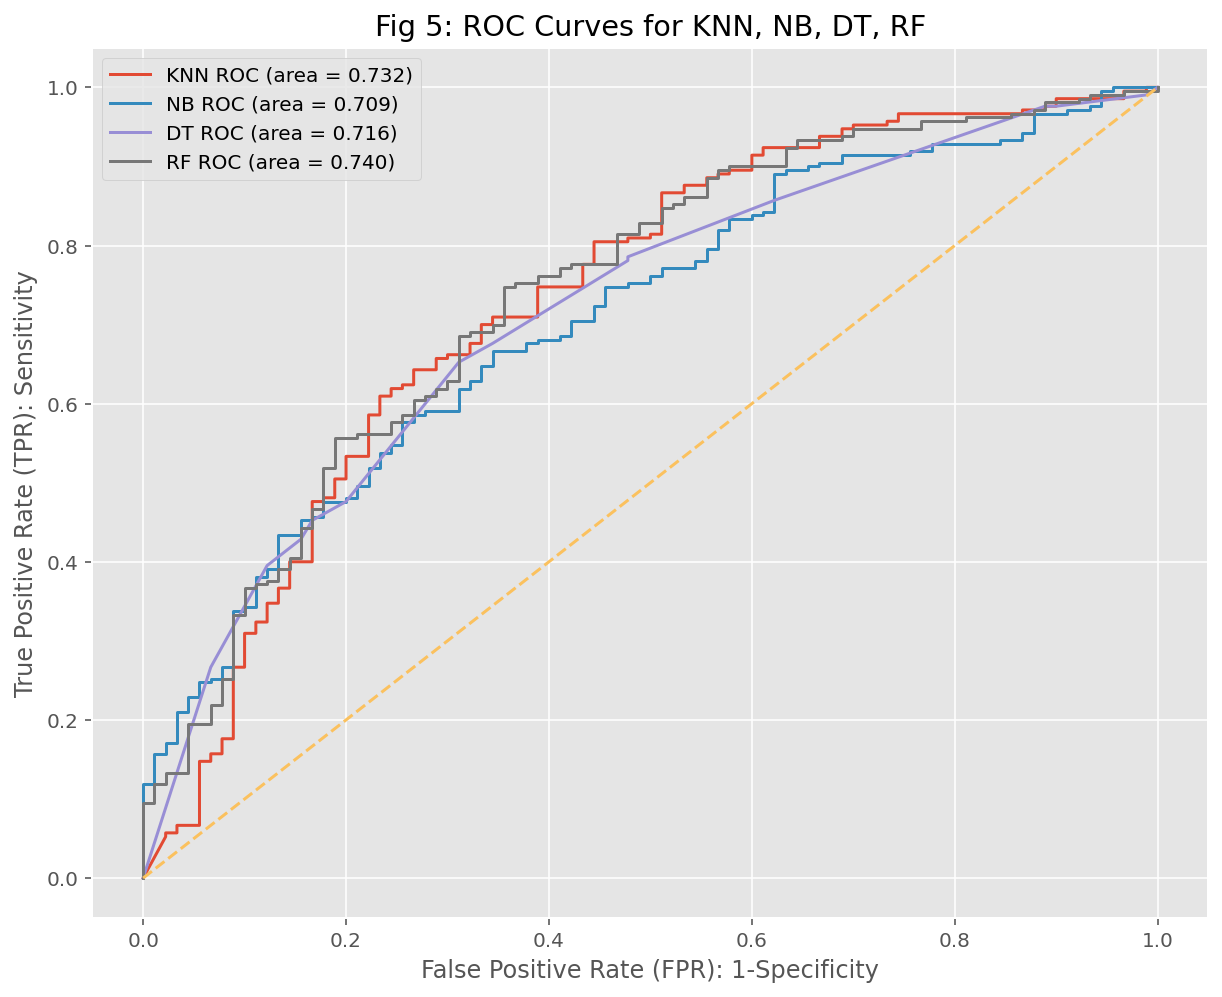

In [48]:
models = [
{
    'label': 'KNN',
    'prob': gs_KNN.best_estimator_.predict_proba(pred_test[:, fs_indices_rfi]),
},
{
    'label': 'NB',
    'prob': gs_NB.best_estimator_.predict_proba(PowerTransformer().fit_transform(pred_test[:, fs_indices_rfi])),
},
{
    'label': 'DT',
    'prob': gs_DT.best_estimator_.predict_proba(pred_test[:, fs_indices_rfi]),
},
{
    'label': 'RF',
    'prob': gs_RF.best_estimator_.predict_proba(pred_test[:, fs_indices_rfi]),
}
]
ax = plt.gca()
for i in models:
    p = i['prob']
    fpr, tpr, _ = metrics.roc_curve(tar_test, p[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (i['label'], roc_auc))
plt.legend(loc=0)
plt.plot([0, 1], [0, 1], '--')
ax.set_xlabel("False Positive Rate (FPR): 1-Specificity")
ax.set_ylabel("True Positive Rate (TPR): Sensitivity")
ax.set_title("Fig 5: ROC Curves for KNN, NB, DT, RF")
plt.show()

We can see from the above plots that the curve for **Random Forest** model has highest AUC of around 0.74. So based on the ROC curves, we can infer that the **Random Forest** classifier is performing better than the rest.

##### Precision-Recall Curves

Since the ROC curves have nearby curvatures and AUC values, we plot Precision-Recall curves for the models as reviewing both precision and recall is useful in cases of a class imbalance. A Precision-Recall curve is a plot of the precision on y-axis and the recall on x-axis for different thresholds between 0 and 1, like ROC curves. These curves help to visualize how the choice of threshold affects classifier performance, and can even help us select the best threshold for a specific problem.

- *Precision* (also known as positive predictive value) can be represented as: $Precision = PPV = \frac{TP}{TP+FP}$, where TP is the number of true positives and FP is the number of false positives. This can be thought of as the fraction of positive predictions that actually belong to the positive class.


- *Recall* (also known as sensitivity) can be represented as $Recall = Sensitivity = \frac{TP}{TP+FN}$, where TP is the number of true positives and FN is the number of false negatives. Recall can be thought of as the fraction of positive predictions out of all positive instances in the data set.

A skillful model is represented by a curve that bows towards (1,1) above the flat line of no skill, i.e., will maintain both a high precision and high recall across the graph hugging towards the upper right corner of the plot. Higher the value of Area Under Curve (AUC), the better is the performance of a classifier.

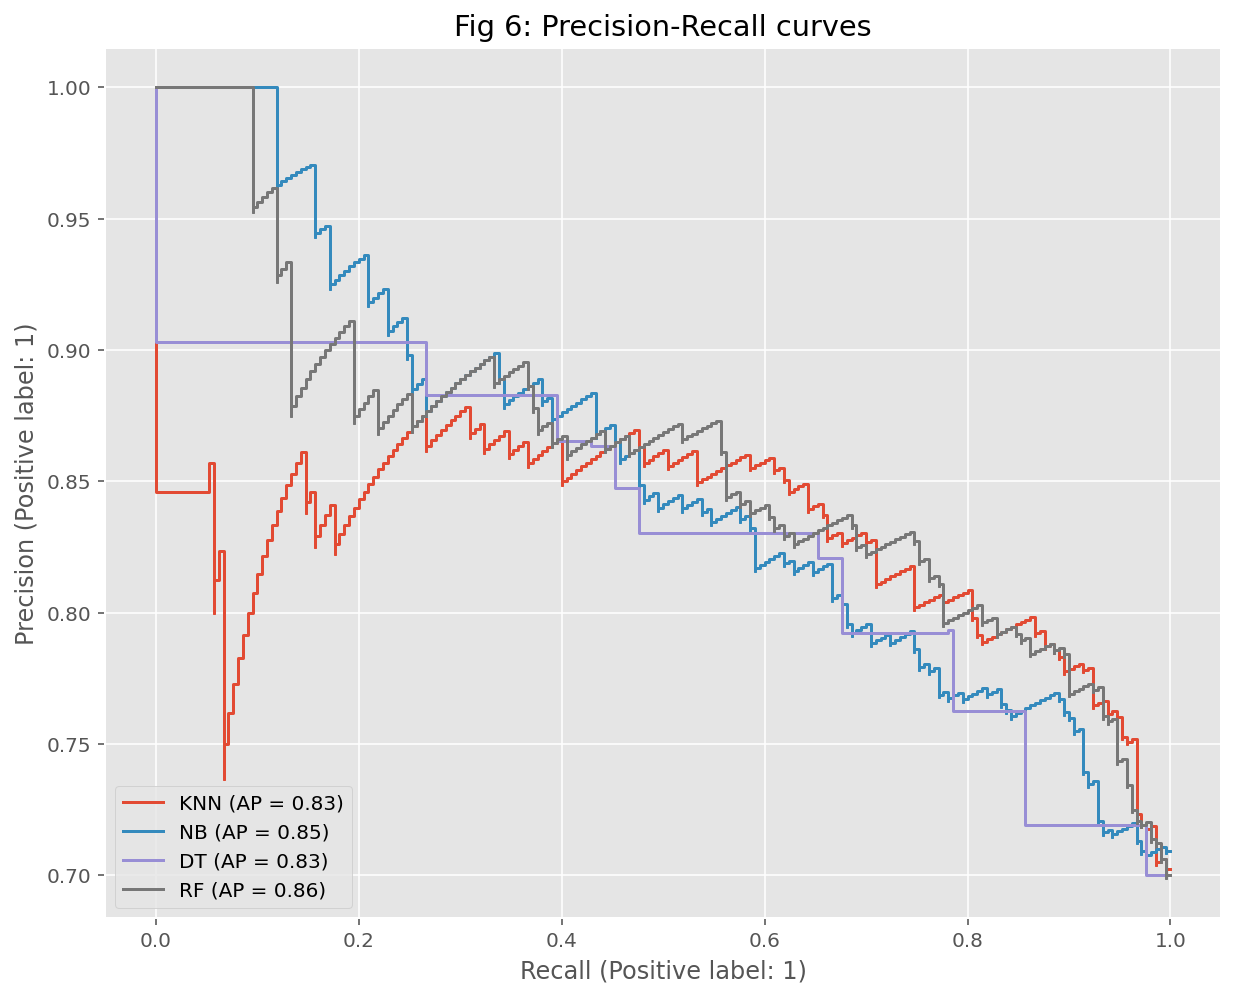

In [49]:
from sklearn.metrics import plot_precision_recall_curve

#KNN
plot_precision_recall_curve(estimator = gs_KNN.best_estimator_,
                            X = pred_test[:, fs_indices_rfi],
                            y = tar_test,
                            ax = plt.gca(),
                            name = 'KNN')

#NB
plot_precision_recall_curve(estimator = gs_NB.best_estimator_,
                            X = PowerTransformer().fit_transform(pred_test[:, fs_indices_rfi]), 
                            y = tar_test,
                            ax = plt.gca(),
                            name = 'NB')
#DT
plot_precision_recall_curve(estimator = gs_DT.best_estimator_, 
                            X = pred_test[:, fs_indices_rfi], 
                            y = tar_test,
                            ax = plt.gca(),
                            name='DT')
#RF
plot_precision_recall_curve(estimator = gs_RF.best_estimator_, 
                            X = pred_test[:, fs_indices_rfi], 
                            y = tar_test,
                            ax = plt.gca(),
                            name='RF')

plt.title('Fig 6: Precision-Recall curves')
plt.show()

The Precision-Recall curves suggest that AUC (denoted by `AP` in the graph labels) for **Random Forests** model is the highest among all. So, we can conclude that the **Random Forests** model really performs the best throughout.

## Critique & Limitations

The modeling strategy used in this analysis has the following limitations:

1. The only feature selection technique we used for ranking and selecting best 10 features is Random Forest Importance (RFI), which is an ensemble-based filter method. In future, we can consider other feature selection methods as well like F-score (statistical method), Mutual Information (entropy-based method), SPSA (wrapper method) <a id="ref1" href=#1>[1]</a> etc., and finally compare performance of all those methods using paired t-tests for each classifiers. We can do this in a robust way by using pipelines.


2. We relied more on predictive performance over interpretability during hyperparameter tuning phase. In future, we can consider a more in-depth analysis about our choices for the hyperparameter spaces.


3. For the Naive Bayes model, we used a power transformation on the training set, which ignores the dummy features. This potentially affected its performance when evaluated on the test set. A possible solution for this is to build a Gaussian NB and a Bernoulli NB separately on the numerical and dummy descriptive features respectively. Then we can compute a final prediction by multiplying predictions from each model, since NB assumes inter-independence conditioned on the value of the target feature. 


4. The dataset contains relatively smaller number of observations (1000). Since machine learning models generally rely on larger datasets for better prediction, we can improve the performance using extra data gathered from the source if possible. 


5. Since the dataset is an old one, there are some features which are almost obsolete now (e.g.,`telephone`). Such features may be removed and also, few additional features may be added which possibly affect credit risk.


6. During the intial phase of modelling, we used Min-Max scaling on the descriptive features. However, in future, we can try other scaling and normalization methods like Robust Scaling, Standard Scaling, Max-Abs Scaling etc. for better handling of outliers and ultimately better prediction results. 


7. The Naive Bayes classifier statistically outperforms the rest of the models. Therefore, we can perhaps improve it by further expanding the hyperparameter search space by including other parameters of this classification method. Furthermore, we can consider other powerful classification models like SVM (Support Vector Machines) etc.


8. The results of cross-validated AUC score show that the Naive Bayes performs best, but the performance metric curves (ROC and Precision-Recall) show Random Forest model as being the best. This clash is possibly because the performance metrics use a different cross-validation method from the one we used for arriving at cross-validation AUC scores (`cv_method`). Further in future, we can improve this by defining a better stratified cross-validation technique with higher folds and repetitions
or using nested cross-validation runs.

## Summary & Insights

To summarize the analyses carried out over both the project phases I and II:

- Credit risk prediction was carried out using Machine Learning models for a South German bank having 1000 loan applicants (containing 700 good and 300 bad credits) between the years 1973 and 1975. The dataset used includes 20 explanatory predictor variables and a target feature with two classes denoting good and bad credit risks.


- Data preprocessing steps including handling missing values, possible outliers and unusual values were carried out. Numeric features were discretized and scaled, and categorical features along with the target feature were correctly encoded. 


- Datasets containing the predictors and target features were converted and saved in `NumPy` array format for further use in modelling using `sklearn`.


- Dataset was explored and visualized using EDA (Exploratory Data Analytics) to get insights about the statistical distributions and relationships between the features.


- Feature Selection was carried out using Random Forest Importance (RFI) to rank the best features for predicting credit risk. As the target is a binary categorical feature with two classes, we applied the following classification algorithms: K-Nearest Neighbors, Gaussian Naive Bayes, Decision Trees, and Random Forests.


- The full dataset was split into training and test sets. Grid search together with feature selection and hyper-parameter tuning were applied on the training set for each classification algorithm, using 5-fold cross-validation method 3 repetitions.


- Model comparison was performed using statistical paired t-tests for cross-validation scores using AUC, to indicate which model seems to work best. Also, each model's performance was evaluated using ROC and Precision-Recall curves.


- Critique & limitations of our approach and possible solutions were discussed.

The **Naive Bayes** model with 10 of the best features selected using Random Forest Importance (RFI) produces the highest mean cross-validated AUC score (0.71) on the training data. Additionally, when evaluated on the test data (in a cross-validated fashion), the Naive Bayes model outperforms all other models with respect to AUC. However, the **Random Forest** model yields the highest AUC based on ROC and Precision-Recall curves on the test data. We selected the best 10 ranking features using RFI rather than working with the full feature set, to avoid potential overfitting and generate models that are easier to train and interpret.

## Conclusion

We can conclude that both **Naive Bayes** and **Random Forest** models seems to work the best in predicting the credit risk classes correctly - good or bad credit risk, although there is a class imbalance. So, when a bank receives a new loan application, based on the applicant’s profile containing the explanatory features as there are in the dataset used, the bank can make a decision regarding whether to go ahead with the loan approval or not using the best machine learning models. This is crucial for a bank, because if the applicant is a good credit risk (likely to repay loan), then not approving the loan would results in a business loss to the bank. In case the applicant is a bad credit risk (not likely to repay the loan), then approving the loan to the person would results in a financial loss to the bank. Therefore, using the best classification models, such losses can be averted, thereby benefiting both the bank and the loan applicants.

---

## References

<a id="1" href=#ref1>[1]</a> Aksakalli, V. (n.d.). *Feature Selection and Ranking in Machine Learning*. Retrieved June 1, 2021, from www.featureranking.com website: https://www.featureranking.com

<a id="2" href=#ref2>[2]</a> Beesion. (2018). *Calculate a highly predictive credit score*. Retrieved June 1, 2021, from beesion.com website: https://beesion.com/credit-analysis/

<a id="3" href=#ref3>[3]</a> Grömping, U. (2019). *South German Credit Data: Correcting a Widely Used Data Set*. Report 4/2019, Reports in Mathematics, Physics and Chemistry, Department II, Beuth University of Applied Sciences Berlin. Available at: http://www1.beuth-hochschule.de/FB_II/reports/Report-2019-004.pdf. Dataset at: [URL](https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29)

<a id="4" href=#ref4>[4]</a> Kelleher, J. D., Brian Mac Namee, & Aoife D'arcy. (2015). *Fundamentals of machine learning for predictive data analytics : algorithms, worked examples, and case studies*. Cambridge, Massachusetts: The Mit Press.

<a id="5" href=#ref5>[5]</a> Koehrsen, W. (2018, January 10). *Hyperparameter Tuning the Random Forest in Python*. Retrieved June 1, 2021, from Medium website: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

<a id="6" href=#ref6>[6]</a> Laken, P. van der. (2019, August 16). *ROC, AUC, precision, and recall visually explained*. Retrieved May 28, 2021, from paulvanderlaken.com website: https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/

<a id="7" href=#ref7>[7]</a> Lanier, S. T. (2020, December 10). *Choosing Performance Metrics*. Retrieved June 1, 2021, from Medium website: https://towardsdatascience.com/choosing-performance-metrics-61b40819eae1

<a id="8" href=#ref8>[8]</a> Saito, T., & Rehmsmeier, M. (2015). *The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets*. PLOS ONE, 10(3), e0118432. https://doi.org/10.1371/journal.pone.0118432

<a id="9" href=#ref9>[9]</a> Steen, D. (2020, September 20). *Precision-Recall Curves*. Retrieved June 2, 2021, from Medium website: https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

<a id="10" href=#ref10>[10]</a> Yenice, Z. D., Adhikari, N., Wong, Y. K., Aksakalli, V., Gumus, A. T., & Abbasi, B. (2018). *SPSA-FSR: Simultaneous Perturbation Stochastic Approximation for Feature Selection and Ranking*. ArXiv:1804.05589 [Stat.ML]